In [1]:
# local imports
from experiments import run_experiment
from utils import running_mean

# global imports
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import defaultdict
import gym
#import gym_toytext

In [2]:
# TODO: epsilon decay

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 66660.90it/s]


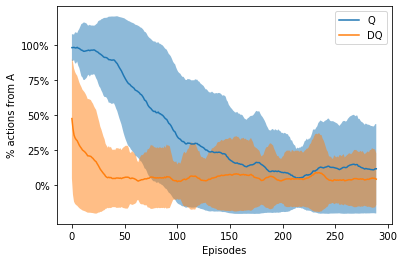

In [14]:
from BiasMDP import BiasMDP

env_name = 'BiasMDP'
environment  = BiasMDP()
num_episodes = 300
num_trails = 50

results = defaultdict(lambda: defaultdict(list))
for i in range(num_trails):
    np.random.seed(i)
    random.seed(i)
    environment.seed(i)
    Q_values, (episode_lengths, episode_returns) = run_experiment( environment,
                                                                   num_episodes,
                                                                   discount_factor=1.0,
                                                                   alpha=0.1,
                                                                   epsilon=0.05,
                                                                   double=False,
                                                                   seed=i)
    results["Q"]["episode_length"].append(np.array(episode_lengths))
    results["Q"]["episode_return"].append(np.array(episode_returns))

    Q_values, (episode_lengths, episode_returns) = run_experiment( environment,
                                                                   num_episodes,
                                                                   discount_factor=1.0,
                                                                   alpha=0.1,
                                                                   epsilon=0.05,
                                                                   double=True,
                                                                   seed=i)
    results["DQ"]["episode_length"].append(np.array(episode_lengths))
    results["DQ"]["episode_return"].append(np.array(episode_returns))
    
for i in results.keys():
    for j in results[i].keys():
        array = np.array(results[i][j])
        results[i][j] = [array.mean(0), array.std(0)]

for j in list(results.keys()):
    mean = running_mean(results[j]['episode_length'][0], 10)
    std = running_mean(results[j]['episode_length'][1], 10)
    plt.plot(mean, label=f"{j}")
    plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.5)
plt.legend()
plt.ylabel("% actions from A")
plt.xlabel("Episodes")
plt.yticks([1,1.25,1.5,1.75,2], ["0%", "25%", "50%", "75%", "100%"])
plt.show()

/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 302.44it/s]


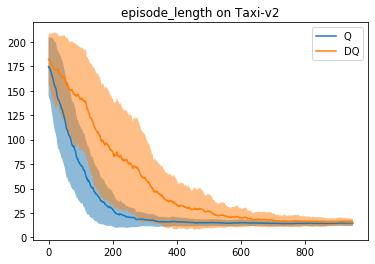

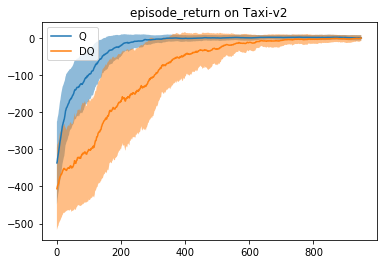

In [4]:
env_name = 'Taxi-v2'
environment  = gym.make(env_name)
num_episodes = 1000
num_trails = 5

results = defaultdict(lambda: defaultdict(list))
for i in range(num_trails):
    np.random.seed(i)
    random.seed(i)
    Q_values, (episode_lengths, episode_returns) = run_experiment( environment,
                                                                   num_episodes,
                                                                   discount_factor=1.0,
                                                                   alpha=0.5,
                                                                   epsilon=0.1,
                                                                   double=False,
                                                                   seed=i)
    results["Q"]["episode_length"].append(np.array(episode_lengths))
    results["Q"]["episode_return"].append(np.array(episode_returns))

    Q_values, (episode_lengths, episode_returns) = run_experiment( environment,
                                                                   num_episodes,
                                                                   discount_factor=1.0,
                                                                   alpha=0.5,
                                                                   epsilon=0.1,
                                                                   double=True,
                                                                   seed=i)
    results["DQ"]["episode_length"].append(np.array(episode_lengths))
    results["DQ"]["episode_return"].append(np.array(episode_returns))
    
for i in results.keys():
    for j in results[i].keys():
        array = np.array(results[i][j])
        results[i][j] = [array.mean(0), array.std(0)]
    
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        mean = running_mean(results[j][i][0],50)
        std = running_mean(results[j][i][1],50)
        plt.plot(mean, label=f"{j}")
        plt.fill_between(range(len(mean)), mean-std, mean+std, alpha = 0.5)
    plt.legend()
    plt.title(f'{i} on {env_name}')
    plt.show()

/home/mario/miniconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|███████████████████████████████████| 25000/25000 [00:06<00:00, 3761.74it/s]


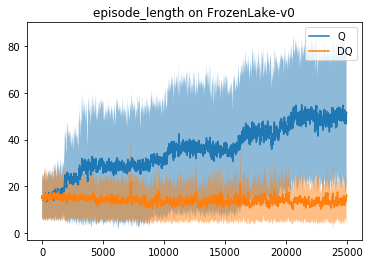

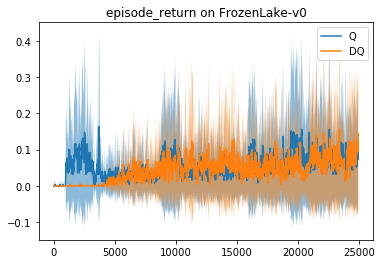

In [5]:
env_name = 'FrozenLake-v0'
environment  = gym.make(env_name)
num_episodes = 25000
num_trails = 5

results = defaultdict(lambda: defaultdict(list))
for i in range(num_trails):
    np.random.seed(i)
    random.seed(i)
    Q_values, (episode_lengths, episode_returns) = run_experiment( environment,
                                                                   num_episodes,
                                                                   discount_factor=1,
                                                                   alpha=0.5,
                                                                   epsilon=0.1,
                                                                   double=False,
                                                                   seed=i)
    results["Q"]["episode_length"].append(np.array(episode_lengths))
    results["Q"]["episode_return"].append(np.array(episode_returns))

    Q_values, (episode_lengths, episode_returns) = run_experiment( environment,
                                                                   num_episodes,
                                                                   discount_factor=1,
                                                                   alpha=0.5,
                                                                   epsilon=0.1,
                                                                   double=True,
                                                                   seed=i)
    results["DQ"]["episode_length"].append(np.array(episode_lengths))
    results["DQ"]["episode_return"].append(np.array(episode_returns))
    
for i in results.keys():
    for j in results[i].keys():
        array = np.array(results[i][j])
        results[i][j] = [array.mean(0), array.std(0)]
    
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        mean = running_mean(results[j][i][0],50)
        std = running_mean(results[j][i][1],50)
        plt.plot(mean, label=f"{j}")
        plt.fill_between(range(len(mean)), mean-std, mean+std, alpha = 0.5)
    plt.legend()
    plt.title(f'{i} on {env_name}')
    plt.show()

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1551.84it/s]


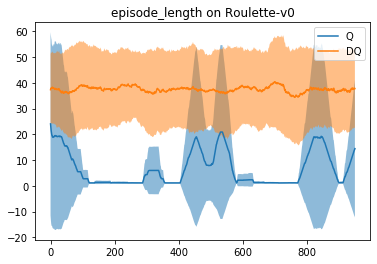

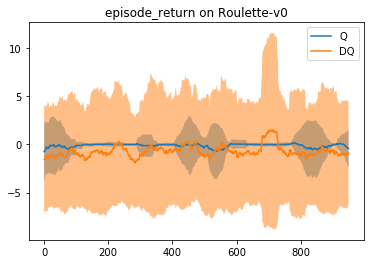

In [6]:
env_name = 'Roulette-v0'
environment  = gym.make(env_name)
num_episodes = 1000
num_trails = 5

results = defaultdict(lambda: defaultdict(list))
for i in range(num_trails):
    np.random.seed(i)
    random.seed(i)
    Q_values, (episode_lengths, episode_returns) = run_experiment( environment,
                                                                   num_episodes,
                                                                   discount_factor=1.0,
                                                                   alpha=0.5,
                                                                   epsilon=0.1,
                                                                   double=False,
                                                                   seed=i)
    results["Q"]["episode_length"].append(np.array(episode_lengths))
    results["Q"]["episode_return"].append(np.array(episode_returns))

    Q_values, (episode_lengths, episode_returns) = run_experiment( environment,
                                                                   num_episodes,
                                                                   discount_factor=1.0,
                                                                   alpha=0.5,
                                                                   epsilon=0.1,
                                                                   double=True,
                                                                   seed=i)
    results["DQ"]["episode_length"].append(np.array(episode_lengths))
    results["DQ"]["episode_return"].append(np.array(episode_returns))
    
for i in results.keys():
    for j in results[i].keys():
        array = np.array(results[i][j])
        results[i][j] = [array.mean(0), array.std(0)]
    
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        mean = running_mean(results[j][i][0],50)
        std = running_mean(results[j][i][1],50)
        plt.plot(mean, label=f"{j}")
        plt.fill_between(range(len(mean)), mean-std, mean+std, alpha = 0.5)
    plt.legend()
    plt.title(f'{i} on {env_name}')
    plt.show()

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 14162.34it/s]


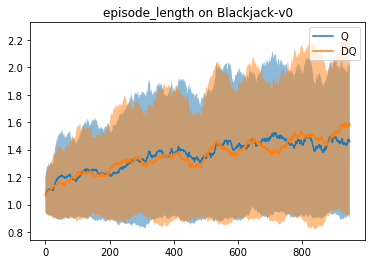

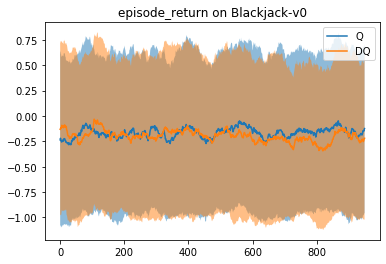

In [7]:
env_name = 'Blackjack-v0'
environment  = gym.make(env_name)
num_episodes = 1000
num_trails = 5

results = defaultdict(lambda: defaultdict(list))
for i in range(num_trails):
    np.random.seed(i)
    random.seed(i)
    Q_values, (episode_lengths, episode_returns) = run_experiment( environment,
                                                                   num_episodes,
                                                                   discount_factor=1.0,
                                                                   alpha=0.5,
                                                                   epsilon=0.1,
                                                                   double=False,
                                                                   seed=i)
    results["Q"]["episode_length"].append(np.array(episode_lengths))
    results["Q"]["episode_return"].append(np.array(episode_returns))

    Q_values, (episode_lengths, episode_returns) = run_experiment( environment,
                                                                   num_episodes,
                                                                   discount_factor=1.0,
                                                                   alpha=0.5,
                                                                   epsilon=0.1,
                                                                   double=True,
                                                                   seed=i)
    results["DQ"]["episode_length"].append(np.array(episode_lengths))
    results["DQ"]["episode_return"].append(np.array(episode_returns))
    
for i in results.keys():
    for j in results[i].keys():
        array = np.array(results[i][j])
        results[i][j] = [array.mean(0), array.std(0)]
    
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        mean = running_mean(results[j][i][0],50)
        std = running_mean(results[j][i][1],50)
        plt.plot(mean, label=f"{j}")
        plt.fill_between(range(len(mean)), mean-std, mean+std, alpha = 0.5)
    plt.legend()
    plt.title(f'{i} on {env_name}')
    plt.show()